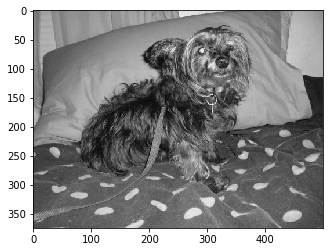

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "D:/tensorflow-practice/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread((os.path.join(path,img)),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [2]:
print("GRAY SCALE Values\n",img_array)

GRAY SCALE Values
 [[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


### Show in Gray Scale

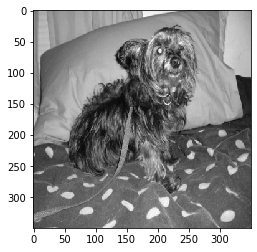

In [3]:
IMG_SIZE = 350
new_img = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img, cmap="gray")
plt.show()

## Show in Binary

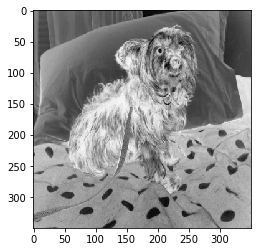

In [4]:
IMG_SIZE = 350
new_img = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img, cmap="binary")
plt.show()

## Create Training Data

In [5]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_img, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
               pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

IMG_SIZE = 30
training_data = []
create_training_data()

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:14<00:00, 843.04it/s]


In [6]:
print(len(training_data))

24946


## Shuffle our training data

In [7]:
import random
random.shuffle(training_data)


# Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. 
# We can confirm this by iterating over a few of the initial samples and printing out the class.

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
0
0
1
0
0


#### 1 means cats, and 0 means dogs

#### Great, we've got the classes nicely mixed in! Time to make our model!


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 54]
   [ 58]
   [ 61]
   [ 62]
   [ 63]
   [ 66]
   [ 68]
   [ 66]
   [ 65]
   [ 64]
   [ 67]
   [ 66]
   [ 67]
   [ 66]
   [ 66]
   [ 66]
   [ 67]
   [ 68]
   [ 75]
   [ 68]
   [ 65]
   [ 68]
   [ 69]
   [ 69]
   [ 72]
   [ 71]
   [ 71]
   [ 70]
   [ 69]
   [ 69]]

  [[ 51]
   [ 74]
   [ 64]
   [ 79]
   [ 71]
   [ 71]
   [ 65]
   [ 65]
   [ 63]
   [ 64]
   [ 66]
   [ 67]
   [ 67]
   [ 66]
   [ 67]
   [ 67]
   [ 66]
   [ 69]
   [ 75]
   [ 76]
   [ 66]
   [ 67]
   [ 67]
   [ 67]
   [ 69]
   [ 70]
   [ 73]
   [ 72]
   [ 72]
   [ 72]]

  [[140]
   [121]
   [128]
   [117]
   [123]
   [115]
   [109]
   [100]
   [ 61]
   [ 61]
   [ 65]
   [ 65]
   [ 64]
   [ 64]
   [ 65]
   [ 66]
   [ 66]
   [ 68]
   [ 68]
   [ 79]
   [107]
   [ 67]
   [ 67]
   [ 67]
   [ 69]
   [ 71]
   [ 73]
   [ 79]
   [ 76]
   [ 77]]

  [[127]
   [126]
   [125]
   [127]
   [129]
   [123]
   [127]
   [127]
   [119]
   [ 80]
   [ 57]
   [ 57]
   [ 58]
   [ 61]
   [ 62]
   [ 64]
   [ 64]
   [ 66]
   [ 70]
   [136]
   [

In [10]:
X # for the images

array([[[[ 54],
         [ 58],
         [ 61],
         ...,
         [ 70],
         [ 69],
         [ 69]],

        [[ 51],
         [ 74],
         [ 64],
         ...,
         [ 72],
         [ 72],
         [ 72]],

        [[140],
         [121],
         [128],
         ...,
         [ 79],
         [ 76],
         [ 77]],

        ...,

        [[147],
         [134],
         [137],
         ...,
         [138],
         [136],
         [127]],

        [[134],
         [135],
         [147],
         ...,
         [144],
         [127],
         [115]],

        [[134],
         [145],
         [128],
         ...,
         [133],
         [119],
         [ 99]]],


       [[[126],
         [135],
         [146],
         ...,
         [142],
         [152],
         [141]],

        [[138],
         [161],
         [164],
         ...,
         [151],
         [146],
         [146]],

        [[163],
         [174],
         [174],
         ...,
         [125],
         [

In [11]:
y # label the cats(1) or dogs(0)

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,


#### Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()